In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [262]:
car_df = pd.read_csv("CarPrice.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [263]:
#checking the shape of the data
car_df.shape

(205, 26)

In [264]:
#cheking the info for data set
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [265]:
#statisical function check 
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [266]:
#since in our data set car company is along with car name, thus spliting them 

car_company = car_df["CarName"].str.split(" ", n = 1, expand = True)
car_df['CarCompany'] = car_company[0]

# Dropping CarName column
car_df.drop('CarName',axis=1,inplace=True)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [267]:
#since we no longe needed the car id, thus we can drop for further analysis

car_df.drop('car_ID',axis = 1, inplace=True)

In [268]:
car_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


data cleaning for correction if we have in our data such as some of the names are mis-spelt


In [269]:
#Replacing '4wd' with 'fwd' in 'drivewheel' column
car_df['drivewheel'] = car_df['drivewheel'].replace('4wd','fwd')

In [270]:
# Replacing 'maxda' with 'mazda' in 'CarCompany' column
car_df['CarCompany'] = car_df['CarCompany'].replace('maxda','mazda')

In [271]:
# Replacing 'porcshce' with 'porsche' in 'CarCompany' column
car_df['CarCompany'] = car_df['CarCompany'].replace('porcshce','porsche')


In [272]:
# Replacing 'toyouta' with 'toyota' in 'CarCompany' column
car_df['CarCompany'] = car_df['CarCompany'].replace('toyouta','toyota')

In [273]:
# Replacing 'vokswagen' with 'volkswagen' in 'CarCompany' column
car_df['CarCompany'] = car_df['CarCompany'].replace('vokswagen','volkswagen')

In [274]:
# Replacing 'vw' with 'volkswagen' in 'CarCompany' column
car_df['CarCompany'] = car_df['CarCompany'].replace('vw','volkswagen')

In [275]:
#handling outliers so that our statistical data appear more readable and presentable

col_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric: 
    q1 = car_df[col].quantile(0.25)
    q3 = car_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    car_df = car_df.loc[(car_df[col] > range_low) & (car_df[col] < range_high)]

car_df.shape

(123, 25)

We can see that there are few columns that have linear relationship with the target variable "price". So, we can build a linear regression model here.

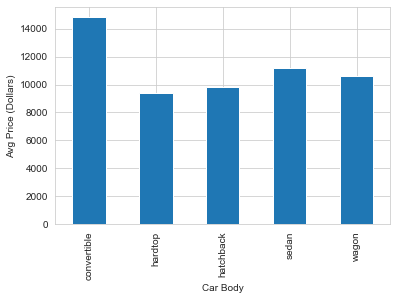

In [276]:
#price comparison with the type of the body

car_df_body_avg_price = car_df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = car_df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show() 

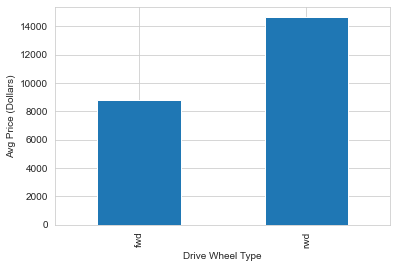

In [277]:
#price based as per the wheel
car_df_drivewheel_avg_price = car_df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = car_df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,1,2,3])
plt.show()

We can say that cars with rear wheel drive have the highest price 

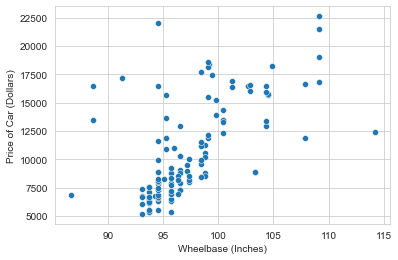

In [278]:
#checking on wheel base

plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = car_df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
ax.set_xticks([0,2,4,6])
plt.show()

 Most cars has a wheel base around 95 inches.
Price has a slight positive correlation with wheelbase

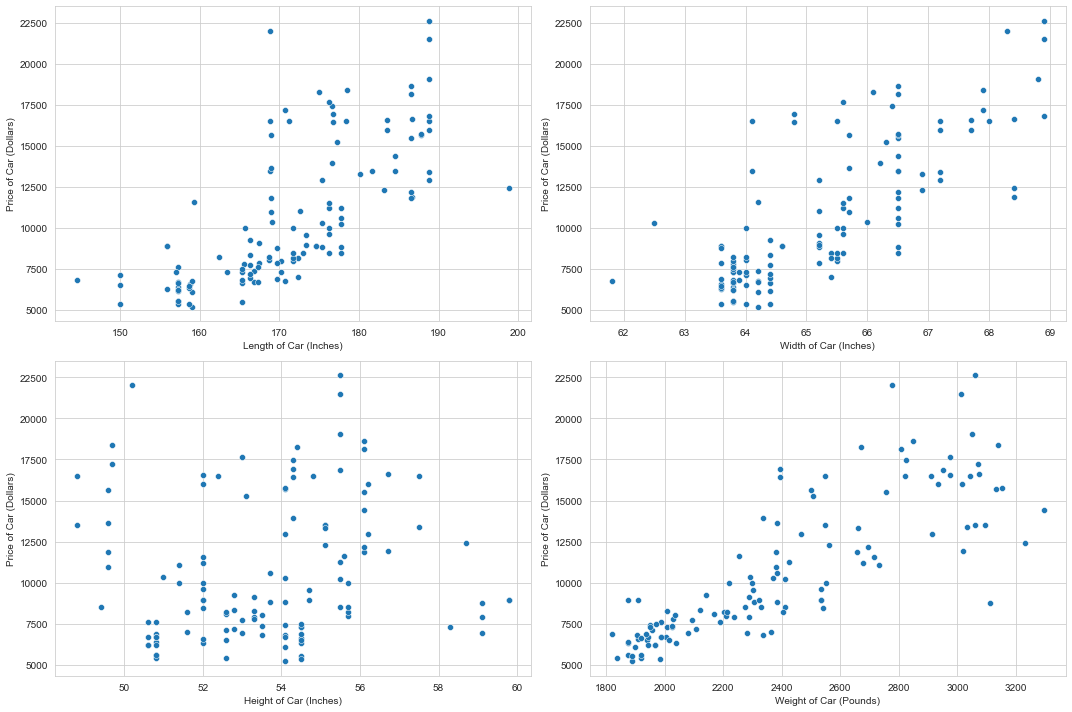

In [279]:
##CAR WITH DIMENSION 
#those cars do have some price differences 

fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = car_df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = car_df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = car_df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = car_df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

Length width and weight of the car is positively related with the price, thus 
There is not much of a correlation with Height of the car with price.

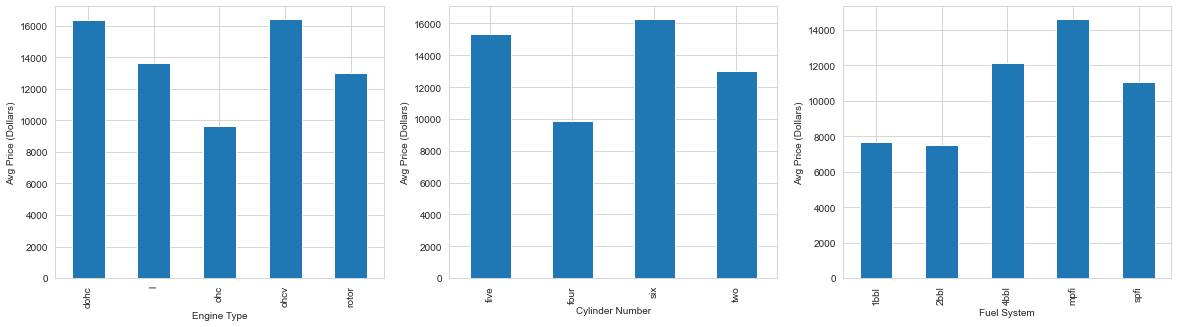

In [280]:
#checking on with Engine type 


fig, axs = plt.subplots(1,3,figsize=(20,5))

car_df_engine_avg_price = car_df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = car_df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,2,4,6])

car_df_cylindernumber_avg_price = car_df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = car_df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,2,4,6])

car_df_fuelsystem_avg_price = car_df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = car_df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,2,4,6])
plt.show()

 ##DOHCV and OHCV engine types are priced high.
 ##Eight and twelve cylinder cars have higher price.
 ##IDI and MPFI fuel system have higher price.

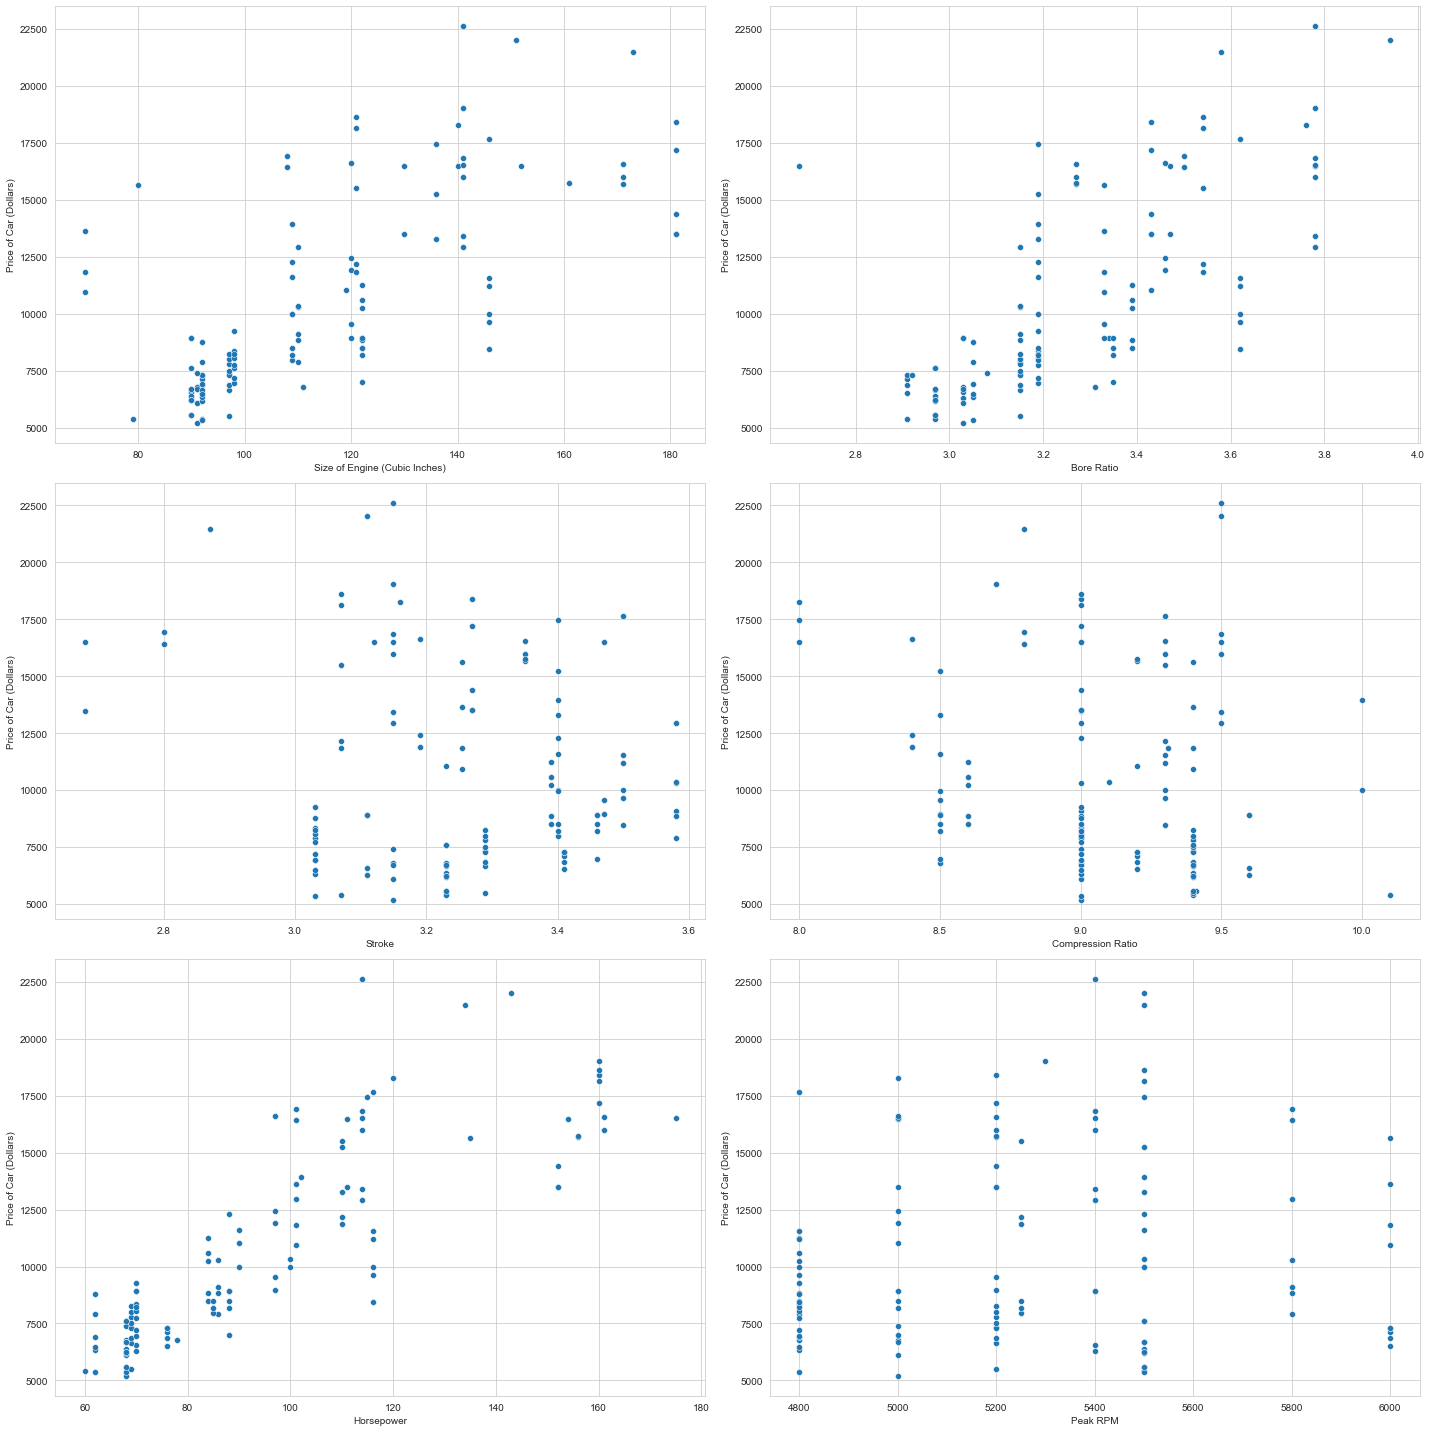

In [281]:
#Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

fig, axs = plt.subplots(3,2,figsize=(20,20))

plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = car_df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')

plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = car_df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')

plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = car_df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')

plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = car_df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')

plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = car_df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')

plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = car_df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

Size of Engine, bore ratio, and Horsepower has positive correlation with price.

In [282]:
#checking with city and mileage price type 

car_df['mileage'] = car_df['citympg']*0.55 + car_df['highwaympg']*0.45

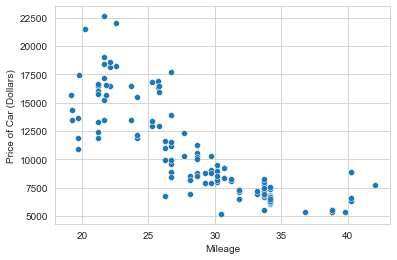

In [283]:
#price as per mileage

plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = car_df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

mileage have some negative co-relation with price

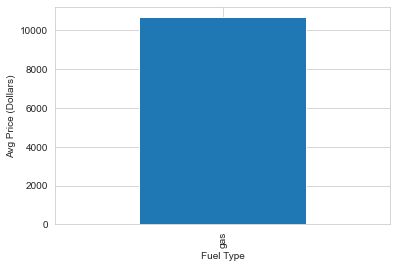

In [284]:
#price as with Fuel type 

car_df_fuel_avg_price = car_df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = car_df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,3])
plt.show()

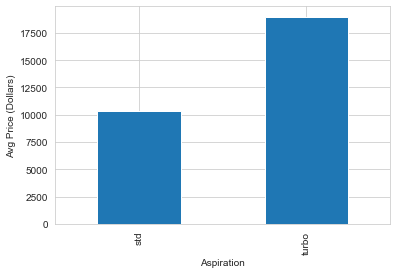

In [285]:
#price as with standard or with Turbo power 

car_df_aspir_avg_price = car_df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = car_df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
ax.set_xticks([0,2,4,6])
plt.show()

Trubo power cars are more expensive with positive impression with price 

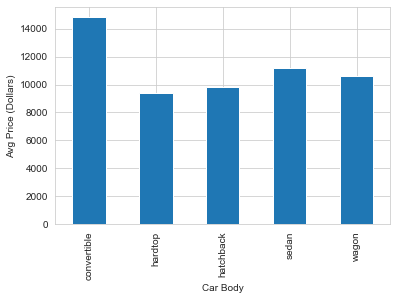

In [286]:
#Carbody and price 

car_df_body_avg_price = car_df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = car_df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")

plt.show() 

In [287]:
#LINEAR Regression model 


auto = car_df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 
               'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'mileage']]



In [288]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,fwd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


<Figure size 1080x1080 with 0 Axes>

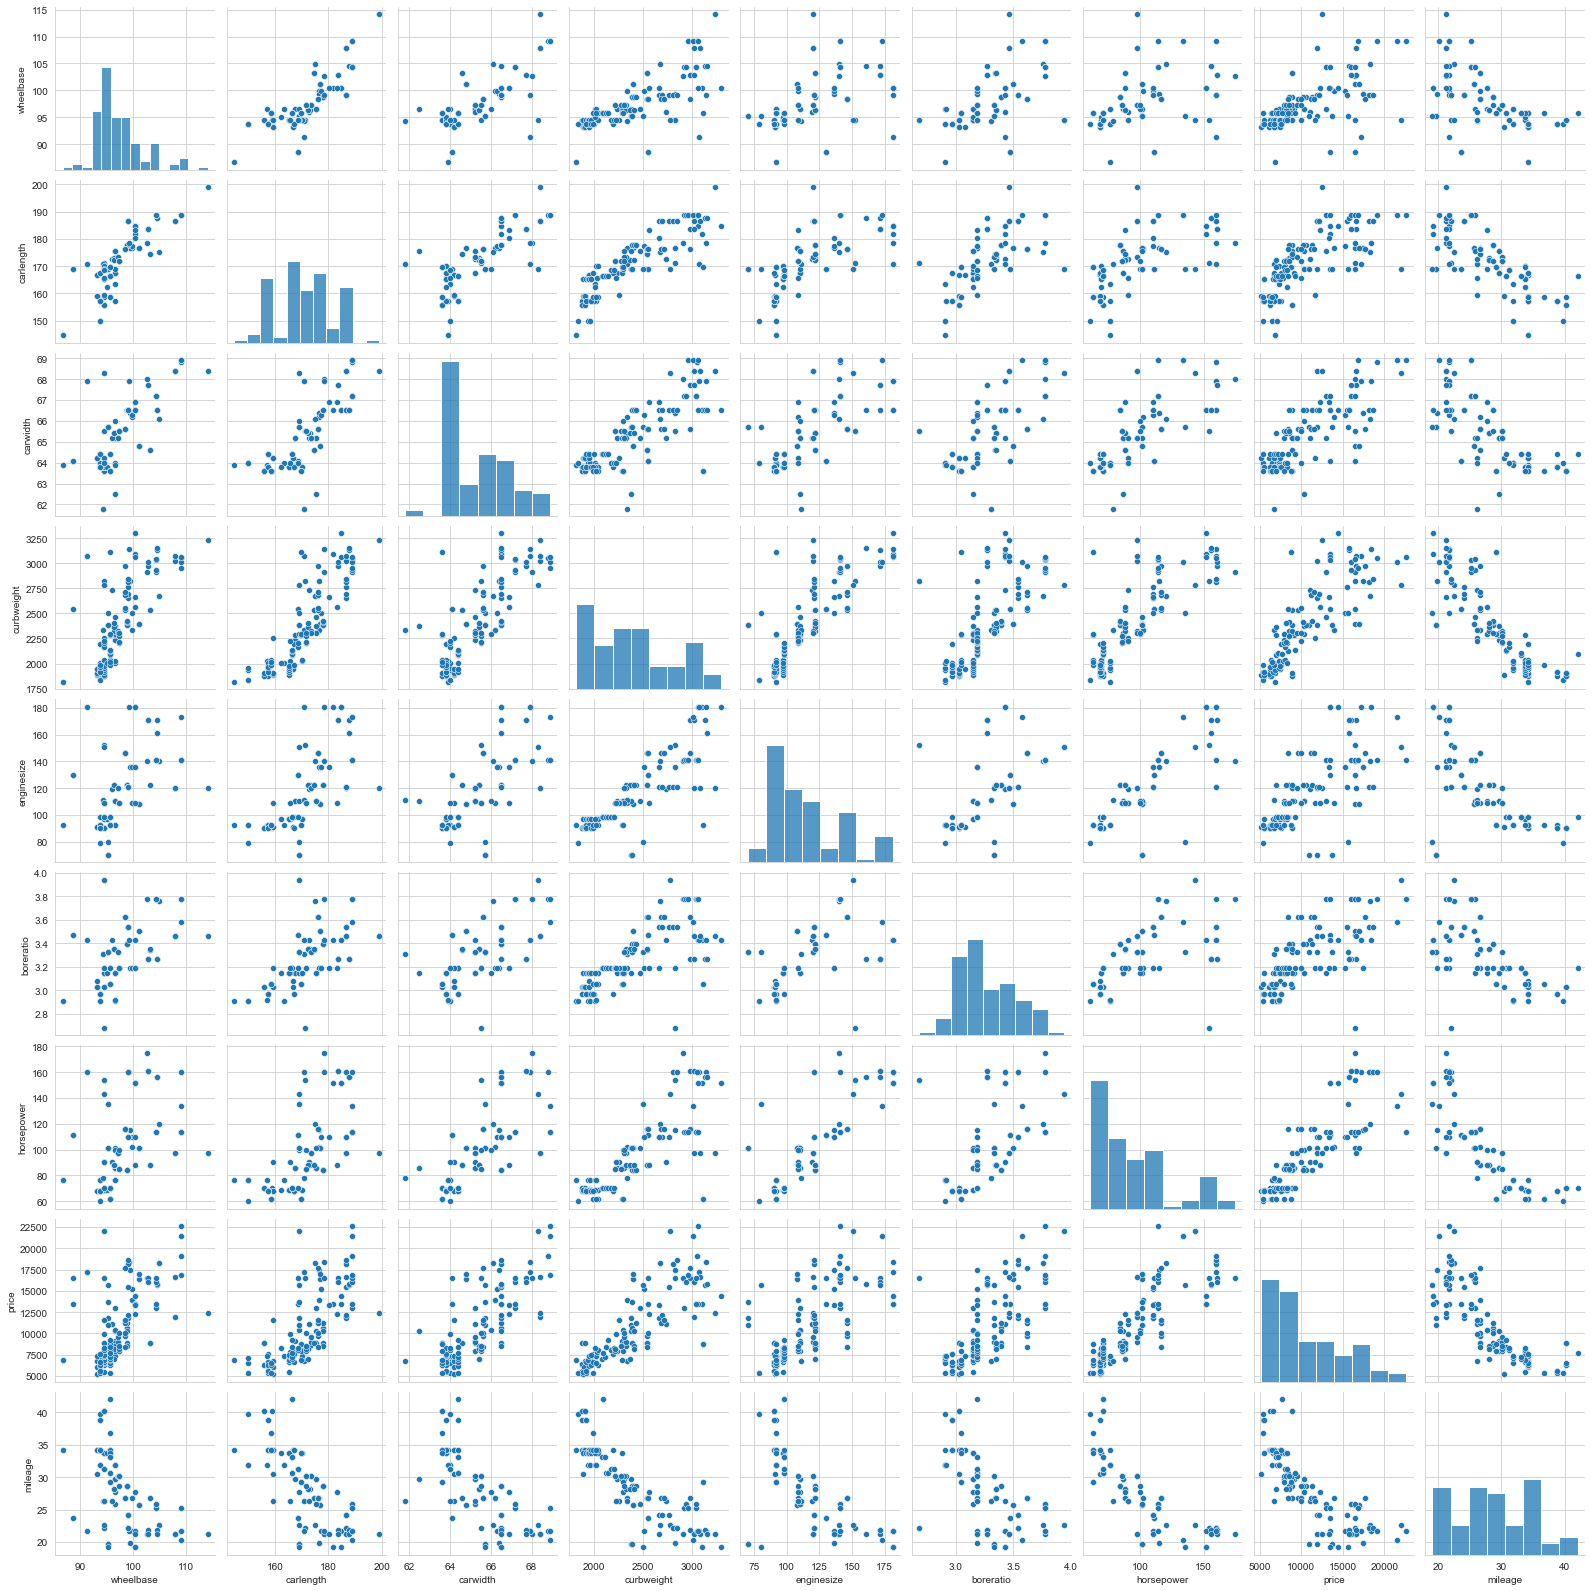

In [289]:
#now visualising the numerical variable in the data 
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

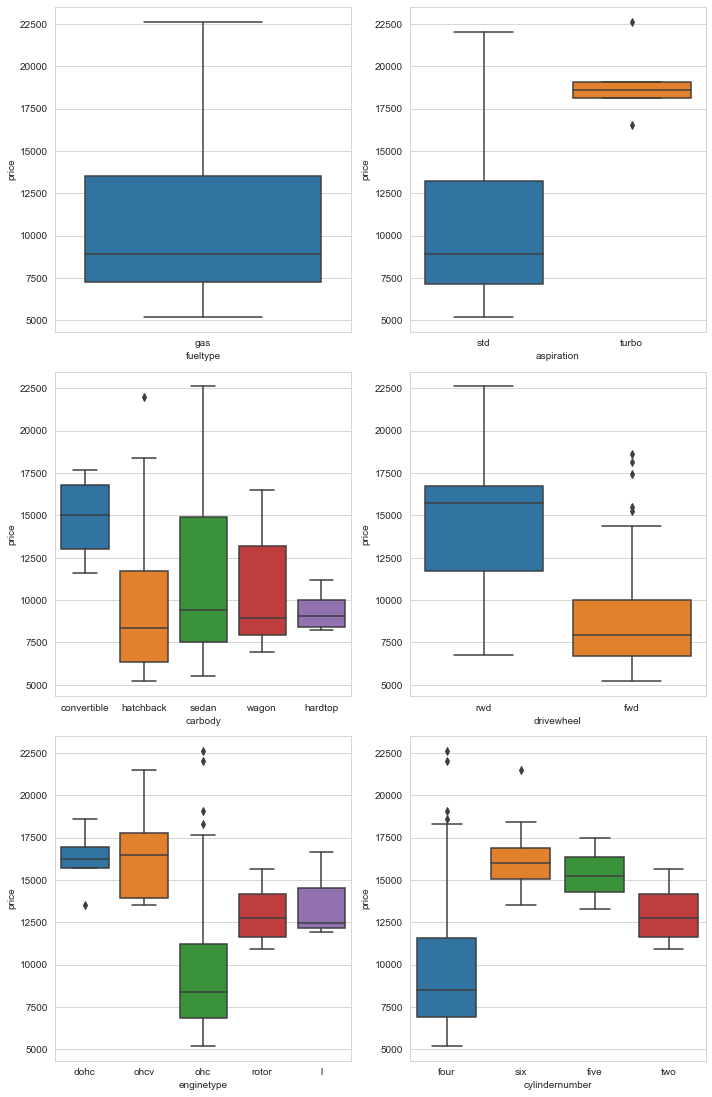

In [290]:
#visualising categorical variable now 

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

In [291]:
#creating dummy varibale for each and every category 

cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)
carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)
asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)


auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], 
          axis = 1, inplace = True)

In [292]:
#model building now 

from sklearn.model_selection import train_test_split

#the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [293]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [294]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [295]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,four,...,l,ohc,ohcv,rotor,rwd,hardtop,hatchback,sedan,wagon,turbo
38,0.358696,0.421731,0.301887,0.318213,0.360360,0.373016,0.226087,0.215015,0.460699,1,...,0,1,0,0,0,0,1,0,0,0
98,0.307971,0.327808,0.037736,0.127962,0.243243,0.373016,0.078261,0.165932,0.635371,1,...,0,1,0,0,0,1,0,0,0,0
180,0.648551,0.795580,0.547170,0.888287,0.909910,0.468254,0.834783,0.597644,0.115721,0,...,0,0,0,0,1,0,0,1,0,0
35,0.358696,0.346225,0.075472,0.129316,0.198198,0.182540,0.139130,0.110583,0.552402,1,...,0,1,0,0,0,0,0,1,0,0
61,0.442029,0.611418,0.547170,0.383209,0.468468,0.563492,0.208696,0.302042,0.417031,1,...,0,1,0,0,0,0,1,0,0,0


In [296]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,four,...,l,ohc,ohcv,rotor,rwd,hardtop,hatchback,sedan,wagon,turbo
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,0.378202,0.468393,0.285871,0.369464,0.387492,0.456349,0.293124,0.292751,0.437214,0.872093,...,0.011628,0.825581,0.05814,0.034884,0.290698,0.046512,0.395349,0.418605,0.093023,0.05814
std,0.162068,0.198184,0.269247,0.273911,0.234993,0.203495,0.262867,0.251332,0.255413,0.335945,...,0.107833,0.381695,0.23538,0.184561,0.456748,0.211825,0.491793,0.496224,0.292169,0.23538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.286232,0.354972,0.042453,0.125931,0.198198,0.293651,0.078261,0.094860,0.266376,1.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.329710,0.449355,0.188679,0.323968,0.346847,0.404762,0.221739,0.198567,0.450873,1.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.442029,0.587477,0.438679,0.549425,0.468468,0.595238,0.443478,0.469134,0.635371,1.000000,...,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


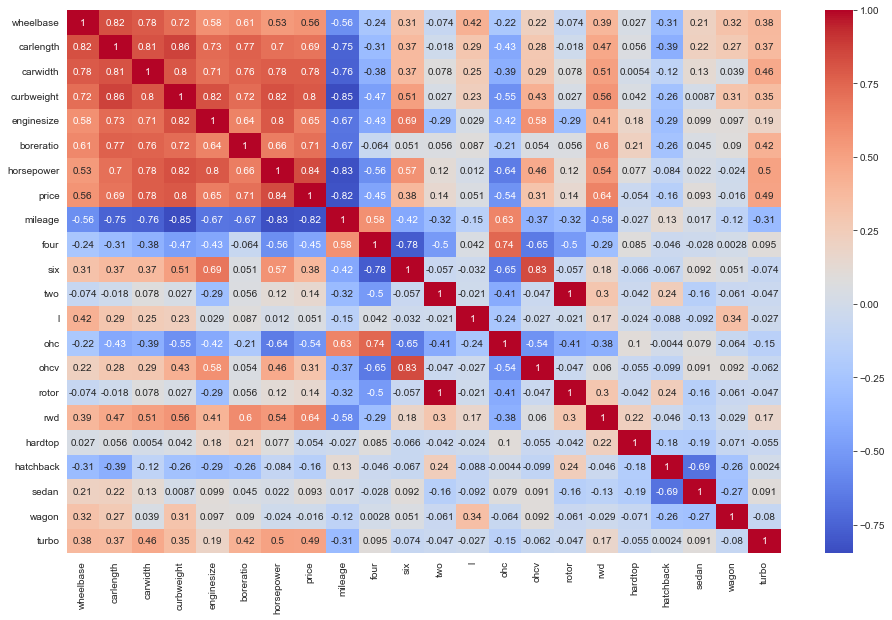

In [297]:
#co-relation check 

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

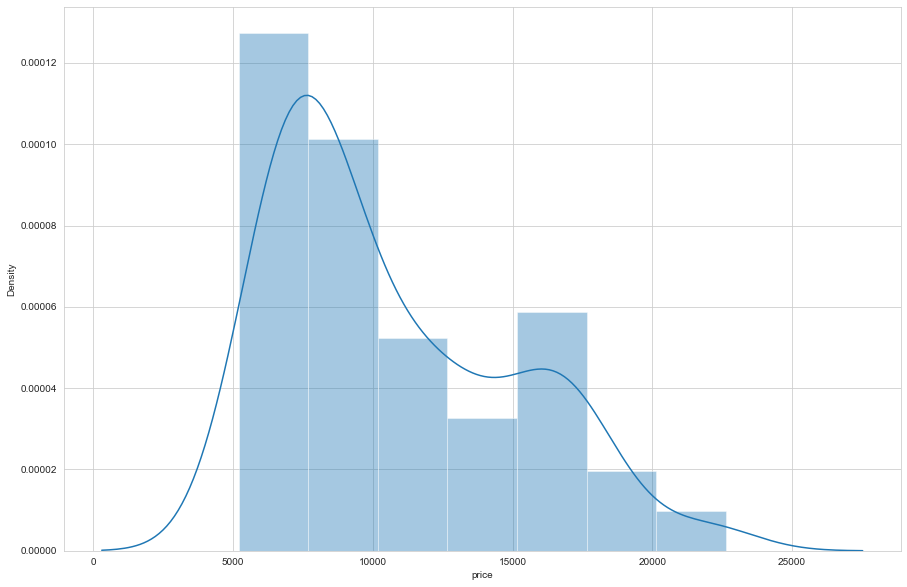

In [298]:
#density plot with price 

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(car_df.price)
plt.show()

In [299]:
#model building for RFE 

y_train = df_train.pop('price')
X_train = df_train

In [300]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'enginesize', 'boreratio', 'horsepower', 'four', 'two',
       'rotor', 'hardtop', 'hatchback', 'wagon'],
      dtype='object')

In [301]:
#for brief statistics RFE 
X_train_rfe = X_train[col]

In [302]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [303]:
#runing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [251]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     37.58
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.86e-24
Time:                        00:02:15   Log-Likelihood:                 70.149
No. Observations:                  86   AIC:                            -120.3
Df Residuals:                      76   BIC:                            -95.75
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3460      0.119      2.915      0.0